In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Download dataset from kaggle - https://www.kaggle.com/mustafaali96/weight-height
df = pd.read_csv('datasets_26073_33239_weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


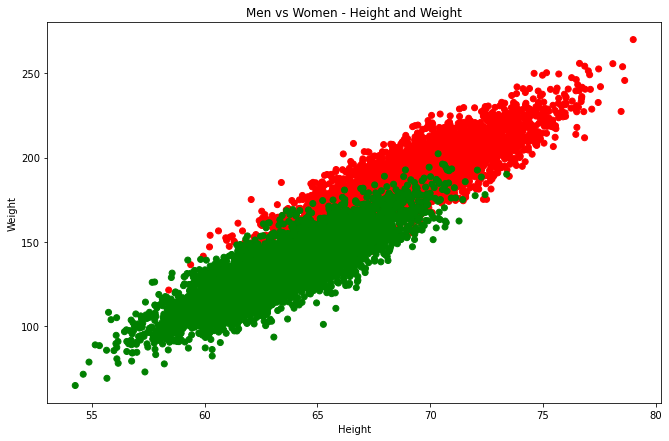

In [3]:
plt.figure(figsize=(11,7))
height = df['Height'].values
weight = df['Weight'].values
genders = df['Gender'].values
color= ['red' if gender == 'Male' else 'green' for gender in genders]
plt.scatter(height, weight, color=color)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Men vs Women - Height and Weight')
plt.show()

In [4]:
df.groupby('Gender')['Gender'].count()

Gender
Female    5000
Male      5000
Name: Gender, dtype: int64

In [5]:
df = pd.get_dummies(df, drop_first=True)
df = df.rename(columns={'Gender_Male': 'Gender'})

In [6]:
X = df[['Height', 'Weight']].values
y = df['Gender'].values
print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
print('Accuracy\n', accuracy_score(y_test, y_pred), '\n\n')
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n\n')
print('Classification Report\n',classification_report(y_test, y_pred))

Accuracy
 0.8993333333333333 


Confusion Matrix
 [[1332  162]
 [ 140 1366]] 


Classification Report
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1494
           1       0.89      0.91      0.90      1506

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



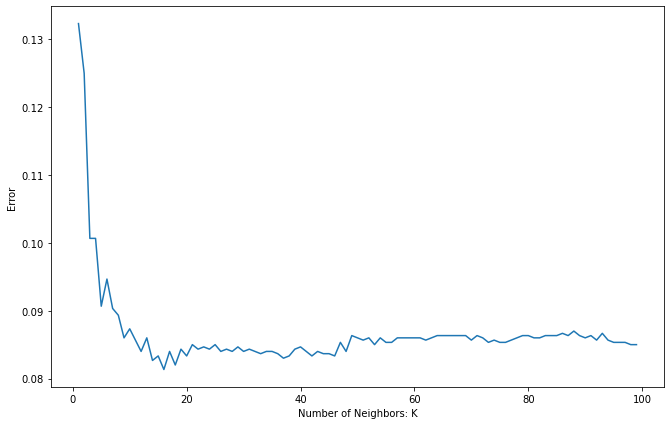

In [11]:
neighbors = []
error = []

for i in range(1, 100):
    neighbors.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))

plt.figure(figsize=(11,7))
plt.plot(neighbors, error)
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Error')
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=71)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [13]:
print('Accuracy\n', accuracy_score(y_test, y_pred), '\n\n')
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n\n')
print('Classification Report\n',classification_report(y_test, y_pred))

Accuracy
 0.9136666666666666 


Confusion Matrix
 [[1354  140]
 [ 119 1387]] 


Classification Report
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      1494
           1       0.91      0.92      0.91      1506

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000

